In [1]:
import os
import h5py
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from scipy.sparse import csr_matrix

print(tf.__version__)
print(keras.__version__)


2.9.1
2.9.0


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import glob
import numpy as np
import json

In [2]:
import textacy


import tensorflow as tf
import numpy as np

# from tensorflow.python.keras.preprocessing import sequence
# from tensorflow.python.keras.preprocessing import text
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('DATASET_3')
char_types = os.listdir('DATASET_3')
print(char_types)
print ("Folders=",len(char_types))

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '6', '7', '8', '9']
Folders= 52


In [3]:
print("Hello")

Hello


In [4]:
chars = []

for item in char_types:
    all_char = os.listdir('DATASET_3' + '/' + item) 
    
    for char in all_char:
        chars.append((item , str('DATASET_3' + '/' + item) + '/'+ char))
        
chars

[('1', 'DATASET_3/1/ses1_ch1_set1_usr100.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr11.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr12.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr14.txt.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr15.txt.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr16.txt.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr19.txt.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr20.txt.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr24.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr25.txt.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr29.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr3.txt.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr33.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr34.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr35.txt.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr36.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr37.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr38.txt.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr39.png'),
 ('1', 'DATASET_3/1/ses1_ch1_set1_usr4.txt.png'),
 ('1', 'DATASET_3/1/s

In [5]:
chars_df = pd.DataFrame(data= chars, columns = ['Char_type', 'image'])
chars_df.head(3)

,Char_type,image
0,1,DATASET_3/1/ses1_ch1_set1_usr100.png
1,1,DATASET_3/1/ses1_ch1_set1_usr11.png
2,1,DATASET_3/1/ses1_ch1_set1_usr12.png


In [6]:
image_count = chars_df['Char_type'].value_counts()
image_count

10    343
21    339
28    337
8     332
9     322
41    319
11    307
22    303
31    293
25    292
12    291
34    288
44    287
32    286
29    283
39    283
40    277
19    276
18    274
23    272
38    271
48    271
47    270
20    267
24    266
2     257
27    253
1     252
6     250
17    249
30    245
46    244
33    243
5     242
35    238
50    237
14    236
45    233
26    232
43    228
7     223
51    219
42    219
3     219
36    212
16    212
4     210
37    208
49    180
15    159
13    156
52    137
Name: Char_type, dtype: int64

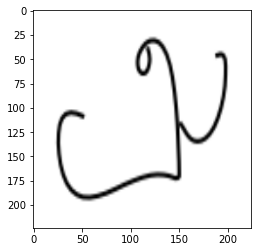

In [7]:
import cv2
path ='DATASET_3/'
im_size = 224
images = []
labels = []

for i in char_types:
    data_path= path+ str(i) #entered in 1st folder and then 2nd folder and then 3rd folder
    filenames = [i for i in os.listdir(data_path) ]
#print (filenames) #will get the names of all images
    for f in filenames:
        img=cv2.imread(data_path+ '/'+ f) #reading that image as array
        #print(img) #will get the imoge as an array
        
        img = cv2.resize(img, (im_size, im_size),1)
#         inputCopy = img.copy()
#         converted_img = cv2.cvtColor(inputCopy, cv2.COLOR_GRAY2BGR)
#         dst = cv2.fastNlMeansDenoisingColored(converted_img, None, 10, 10, 7, 15) 
        images.append(img)
        
        labels.append(i)
plt.imshow(img)

In [8]:
images =np.array(images)
images.shape

(13342, 224, 224, 3)

In [9]:
images = images.astype( 'float32') / 255.0
# images = images.astype( 'int16') / 255.0
# images = images.astype( 'int16') / 255.0
# chars_df
# images.shape

In [10]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# y= chars_df['Char_type'].values
# #
# y_labelencoder= LabelEncoder ()
# y= y_labelencoder.fit_transform (y)
# #print (y)
# y=y.reshape(-1,1)
# onehotencoder = OneHotEncoder(categorical_features=[0])  #
# Y= onehotencoder.fit_transform(y)
# Y.shape #(393, 3)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = chars_df
dfle.Char_type = le.fit_transform(dfle.Char_type)
dfle


,Char_type,image
0,0,DATASET_3/1/ses1_ch1_set1_usr100.png
1,0,DATASET_3/1/ses1_ch1_set1_usr11.png
2,0,DATASET_3/1/ses1_ch1_set1_usr12.png
3,0,DATASET_3/1/ses1_ch1_set1_usr14.txt.png
4,0,DATASET_3/1/ses1_ch1_set1_usr15.txt.png
...,...,...
13337,51,DATASET_3/9/ses2_ch9_set2_usr93.txt.png
13338,51,DATASET_3/9/ses2_ch9_set2_usr94.png
13339,51,DATASET_3/9/ses2_ch9_set2_usr95.txt.png
13340,51,DATASET_3/9/ses2_ch9_set2_usr96.png


In [13]:

Y = dfle[['Char_type']].values
Y


array([[ 0],
       [ 0],
       [ 0],
       ...,
       [51],
       [51],
       [51]])

In [14]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Char_type', OneHotEncoder(), [0])], remainder = 'passthrough')

In [16]:
Y = csr_matrix(Y)
Y.todense()
Y.toarray()
Y = ct.fit_transform(Y.todense())
Y

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.]])

In [17]:
from sklearn. utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state= 415)

# einpect the shape of the training and testing.

print (train_x. shape)
print (train_y. shape)
print (test_x. shape)
print (test_y.shape)

(12674, 224, 224, 3)
(12674, 53)
(668, 224, 224, 3)
(668, 53)


# Code





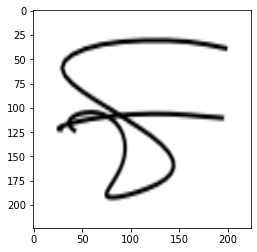

In [18]:
plt.imshow(train_x[2120])

In [19]:


import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense , Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model

from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense , Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D

In [20]:
# def identity_block(X, f, filters):
    
#     # Retrieve Filters
#     F1, F2, F3 = filters
    
#     X_shortcut = X
    
#     # First layer
#     X = Conv2D(filters= F1, kernel_size = (1, 1), strides= (1,1), padding = 'valid')(X)
#     X = BatchNormalization ( axis = 3)(X)
#     X= Activation('relu')(X)
        
#     #Second Layer   
#     X = Conv2D(filters= F2, kernel_size = (f, f), strides= (1,1), padding ='same')(X)
#     X = BatchNormalization (axis = 3)(X)
#     X = Activation('relu')(X)


#     # Third Layer
#     X = Conv2D(filters = F3, kernel_size = (1, 1), strides =(1,1), padding= 'valid' )(X)
#     X = BatchNormalization(axis=3)(X)
    
#     # Final step: Add shortcut value to F(X), and pass it through a RELU activation
#     K = Add()([X, X_shortcut ])
#     X = Activation ('relu' )(X)
#     return X


In [21]:
# def convolutional_block (X, f, filters, s = 2):
   
#     #Retrieve Filters
#     F1, F2, F3= filters
    
#     # Save the input value
#     X_shortcut = X
    
    
#     # First Layer
#     X= Conv2D(F1, (1, 1), strides = (s,s))(X) # 1,1 is filter size
#     X= BatchNormalization(axis = 3) (X) # normal izat ion on channels
#     X= Activation ('relu') (X)

#     # Second layer (f.f)-3*3 filter by default
#     X= Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding= 'same')(X)
#     X = BatchNormalization (axis = 3)(X)
#     X= Activation ('relu')(X)

#     #Third Layer
#     X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid' )(X)
#     X= BatchNormalization(axis = 3) (X)
    
#     #######SHORTCUT PATH########
    

#     X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides =(s,s), padding = 'valid' )(X_shortcut)
#     X_shortcut = BatchNormalization(axis = 3)(X_shortcut)
    
#     # Final step: Add shortcut value here, and pass it through a RELU activation
#     X = Add()([X, X_shortcut ])
#     X= Activation ('relu')(X)
    
#     return X

# Defining ResNet50


In [22]:
# def ResNet50(input_shape=(224, 224,3), classes=52) :
    
#     """
#     Implementation of the ResNet50 architecture:
    
#     CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
#     -> COVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2-> AVGPOOL > TOPLAYER
    
#     """
#     #Define the input with shape input_shape
    
#     X_input = Input(input_shape)
    
#     # Zero-Padding
#     X = ZeroPadding2D((3, 3))(X_input) #3,3 padding
   
    
#     #stage 1
#     X = Conv2D(64, (7,7),strides=(2, 2))(X)
#     X = BatchNormalization (axis = 3)(X)
#     X = Activation ('relu')(X)
#     X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
#     #stage 2
#     X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
    
#     # below 3 Lines are the conv Layers from convolutional_block function defined above
#     #X = Conv2D(F1, (1, 1), strides = (s, s)) (X)
#     #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding= 'same') (X)
#     #X = Conv2D(F3, (1, 1), strides =(s, s), name= conv_name_base+ '2a' )(X)
    
               
#     X = identity_block(X, 3, [64, 64, 256])
#     #X= Conv2D(filters =F1, kernel_size =(1, 1), strides= (1, 1), padding= 'valid') (X)
#     #X= Conv2D(filters= F2, kernel_size = (f, f), strides= (1,1), padding ='same')(X)
#     #X= Conv2D(filters =F3, kernel size = (1, 1), strides =(1,1), padding='valid') (X)
               
#     X = identity_block(X, 3, [64, 64, 256])
#     #X = Conv2D(filters= F1, kernel_size = (1, 1), strides = (1,1), padding='valid') (X)
#     #X = Conv2D(filters =F2, kernel_size = (f, f), strides = (1,1), padding ='same')(X)
#     #X = Conv2D(filters= F3, kernel_size = (1, 1), strides = (1,1), padding ='valid')(X)
    
    
    
#     # Stage 3
#     X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 2)
#     X = identity_block(X, 3, [128, 128, 512])
#     X = identity_block(X, 3, [128, 128, 512])
#     X = identity_block(X, 3, [128, 128, 512])
   

#     # stage 4
#     X = convolutional_block (X, f = 3, filters= [256, 256, 1024], s = 2)
#     X = identity_block(X, 3, [256, 256, 1024])
#     X = identity_block(X, 3, [256, 256, 1024])
#     X = identity_block(X, 3, [256, 256, 1024])
#     X = identity_block(X, 3, [256, 256, 1024])
#     X = identity_block(X, 3, [256, 256, 1024])
   

#     # stage 5
#     X = convolutional_block (X, f = 3, filters =[512, 512, 2048], s = 2)
#     X = identity_block(X, 3, [512, 512, 2048])
#     X = identity_block(X, 3, [512, 512, 2048])
    
    
#     # AVGPOOL
#     X = AveragePooling2D((2,2), name="avg_pool")(X)
    
#     #######END CODE HERE ######
    
#        #OUTPUT LAYER
#     X = Flatten()(X)
#     X= Dense(classes, activation = 'softmax', name = 'fc'+ str(classes) , kernel_initializer = glorot_uniform(seed=0))(X)
    
#     #Create Model
    
#     model = Model(inputs = X_input, outputs= X, name = 'ResNet50')
    
#     return model
    

In [23]:
# print(train_x)


In [24]:
train_y


matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [25]:
# import tensorflow as tf
# tf.keras.applications.ResNet50(include_top=True, classes=52, weights=None)
# from scipy.sparse import csr_matrix
# train_y.todesne()


In [26]:
# model = ResNet50(input_shape= (224, 224,3), classes =52)

model= tf.keras.applications.ResNet50(include_top=True , classes=53, weights=None)

In [27]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [28]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [ ]:
# x_train = vectorizer.fit_transform(train_texts).todense()
# x_val = vectorizer.transform(val_texts).todense()

In [29]:
model.fit(train_x, train_y,  epochs=6, batch_size= 48)


Epoch 1/6
265/265 [==============================] - 2612s 10s/step - loss: 32.0467 - accuracy: 0.9326
Epoch 2/6
158/265 [================>.............] - ETA: 17:12 - loss: 79.6090 - accuracy: 0.9180

KeyboardInterrupt: 

In [ ]:
# indices=Tensor("DeserializeSparse:0", shape=(None, 2), dtype=int64)
# values=Tensor("DeserializeSparse:1", shape=(None,), dtype=float32)
# dense_shape=Tensor("stack:0", shape=(2,), dtype=int64)

In [43]:
# predictions = model.evaluate(test_x,test_y)
# print("Loss = " + str(predictions[0]))
# print("Test Accuracy = " + str(predictions[1]))

4/4 [==============================] - 5s 1s/step - loss: 362.4509 - accuracy: 0.6923
Loss = 362.45086669921875
Test Accuracy = 0.692307710647583
